**Task:** K-NN optimization for digits recognition task.

[Data description](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)

**Deadline:** due 23:59 16.09.2016

Please add your surname to the name of this ipynb file

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sklearn as skl
import pandas as pd
import sklearn

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [3]:
pd.options.display.max_colwidth=100
np.set_printoptions(linewidth=140,edgeitems=10)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
rcParams['figure.figsize'] = (8.0, 5.0)

In [4]:
digits = datasets.load_digits() # load data

In [5]:
print(digits.DESCR[:350])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin


In [6]:
list(digits.keys())
# images - images, corresponding to each object
# target_names - class names
# target - vector of classes
# data - design matrix (objects vs. features) features is linearized image-matrix.
# DESCR - data description

['images', 'target_names', 'target', 'DESCR', 'data']

In [7]:
digits.target_names # classes correspond to digits, dispayed on images

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
digits.target # vector of classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, ..., 5, 4, 8, 8, 4, 9, 0, 8, 9, 8])

# Tasks:

## 1.Visualize first 5 objects as images

You may use function **imshow**

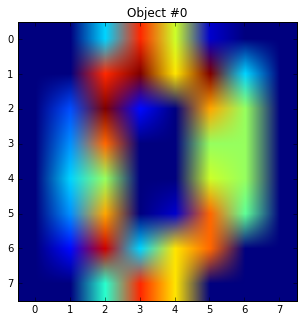

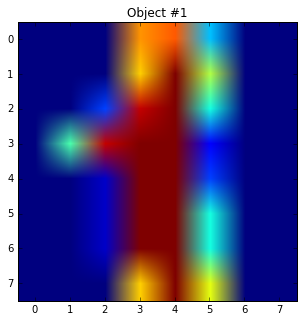

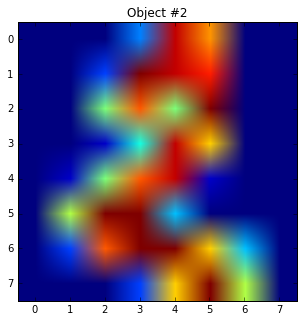

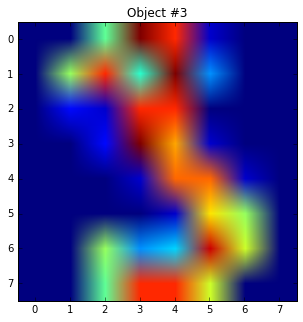

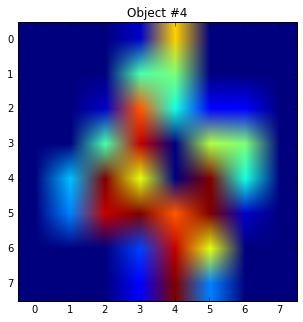

In [9]:
for i,image in enumerate(digits.images[0:5]):
    figure();
    title("Object #%d" % i)
    imshow(image)

# Shuffle objects and divide them into two equal parts - train and test

In [10]:
from sklearn.cross_validation import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.5)

### 3.Plot how error-rate depends on the number of nearest neighbours for K-NN method

You should use [K-NN from scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) 

In [12]:
from sklearn.grid_search import GridSearchCV

In [13]:
error_rate = lambda estimator, X, y: -(1 - estimator.score(X,y))

In [14]:
param_to_fit = "n_neighbors"

In [15]:
nums_of_neighbours = np.arange(1,31,2)

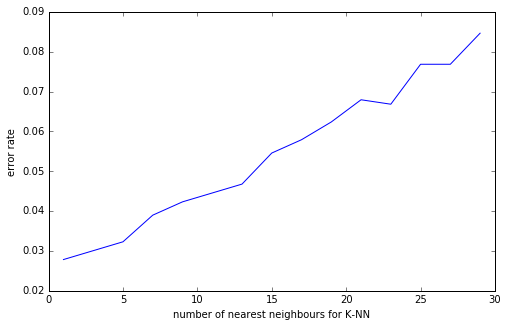

In [16]:
clf = GridSearchCV(KNeighborsClassifier(n_jobs=-1), \
                   param_grid={param_to_fit: nums_of_neighbours}, \
                   scoring=error_rate, \
                   refit=False)
clf.fit(X_train,y_train)

scores = clf.grid_scores_

num_neighbors_to_error_rate = dict(map(lambda t: (t.parameters[param_to_fit],-t.mean_validation_score ),scores))

plot([*num_neighbors_to_error_rate.keys()],[*num_neighbors_to_error_rate.values()])
ylabel("error rate")
xlabel("number of nearest neighbours for K-NN");

### 3a.Which number of neighbours is optimal?

In [17]:
optimal_num_of_neighbours = clf.best_params_[param_to_fit]

print("We have the least error rate %.6f for number of neighbours equal to %d. Thus %d is optimal." % \
      (-clf.best_score_, optimal_num_of_neighbours, optimal_num_of_neighbours))

We have the least error rate 0.027840 for number of neighbours equal to 1. Thus 1 is optimal.


### 4.Plot how error-rate depends on the p parameter for Minkowski metric in K-NN?

In [18]:
param_to_fit = "p"

In [19]:
ps = np.arange(1,11,1)

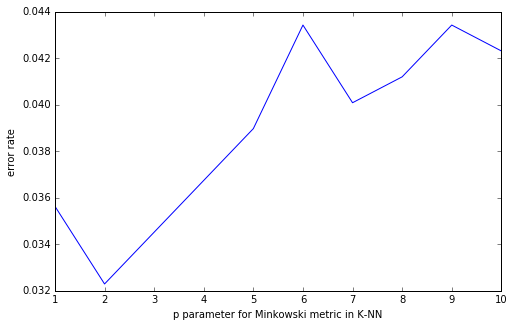

In [20]:
clf = GridSearchCV(KNeighborsClassifier(n_jobs=-1), \
                   param_grid={param_to_fit: ps}, \
                   scoring=error_rate, \
                   refit=False)
clf.fit(X_train,y_train)

scores = clf.grid_scores_

p_to_error_rate = dict(map(lambda t: (t.parameters[param_to_fit],-t.mean_validation_score ),scores))

plot([*p_to_error_rate.keys()],[*p_to_error_rate.values()])
ylabel("error rate")
xlabel("p parameter for Minkowski metric in K-NN");

### 4а.Which number p is optimal?

In [21]:
optimal_p = clf.best_params_[param_to_fit]

print("We have the least error rate %.6f for p parameter for Minkowski metric equal to %d. Thus %d is optimal." % \
      (-clf.best_score_, optimal_p, optimal_p))

We have the least error rate 0.032294 for p parameter for Minkowski metric equal to 2. Thus 2 is optimal.


### 5.Find optimal pair (number of neighbours, p) for K-NN using cross-validation

You may use **skl.grid_search.GridSearchCV**

In [22]:
clf = GridSearchCV(KNeighborsClassifier(n_jobs=-1), \
                   param_grid={'n_neighbors' : nums_of_neighbours,'p': ps}, \
                   scoring='accuracy', \
                   refit=False)
clf.fit(X_train,y_train)

optimal_pair = (clf.best_params_['n_neighbors'],clf.best_params_['p'])
print("Best pair is: num of neighbours = %d, p = %d" % optimal_pair)

Best pair is: num of neighbours = 1, p = 2


Is found pair the same as a optimal number of neighbours and p found in previous task? Why?

In [23]:
if (optimal_num_of_neighbours,optimal_p) == optimal_pair:
    print("Found pair of parameters is same as those found in previous task. But it is not always so.")
else:
    print("Found pair of parameters is not same as those found in previous task.")

Found pair of parameters is same as those found in previous task. But it is not always so.


I also used **GridSearchCV** in previous tasks to deduce dependency between error rate and corresponding parameter and to find optimal. But I used it __independently__ on *number of nearest neighbours* and on *p*, thus cross validation on one parameter was performed with default value of other one, which could be not the optimal one.
Thus in general found pair will not be the same as previous values.

### 6.Solve task 5 with object weights: 
1. uniform weights
1. inversely proportional to distance
2. linearly dependent from distance (see lectures, need to implement weighting function yourself)

Write what (number of neighbours, p) and weights is finally optimal?

In [24]:
def linear_dependence(distances):
    min_dist = distances.min()
    max_dist = distances.max()
    if max_dist == min_dist:
        return ones(distance.shape)
    return (max_dist - distances)/ (max_dist - min_dist)
    
object_weights = ['uniform','distance',linear_dependence]

In [25]:
clf = GridSearchCV(KNeighborsClassifier(n_jobs=-1), \
                    param_grid={'n_neighbors' : nums_of_neighbours,'p': ps,'weights': object_weights}, \
                    scoring='accuracy', \
                    refit=False)
clf.fit(X_train,y_train)

optimal_vals_dict = {
    'n_neighbors':clf.best_params_['n_neighbors'],
    'p':clf.best_params_['p'],
    'weights':clf.best_params_['weights']
}

print("Final optimal values:")
for param, val in optimal_vals_dict.items():
    print("   %s = %s" % (param, val))

Final optimal values:
   weights = <function linear_dependence at 0x7f834fdf5840>
   p = 2
   n_neighbors = 3


### 8. Solve task 6 for scaled features.

You need to test two scalers: statistical scaling and range scaling (see lectures)

Useful functions: sklearn Scaler classes or **mean** and **std** 
(Gotcha: should you use A.std() or A.std(axis=0)?)

In [26]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

statistical_scaler = ("statistical scaler", StandardScaler().fit(X_train))
range_scaler = ("range scaler", MinMaxScaler().fit(X_train))

In [27]:
from sklearn.cross_validation import cross_val_score

scaler_to_mean_accuracy = dict(\
       map(lambda scaler: (scaler, cross_val_score(\
                                KNeighborsClassifier(**optimal_vals_dict,n_jobs=-1),\
                                scaler[1].transform(X_train),\
                                y_train)\
                            .mean()),\
            [statistical_scaler,range_scaler]))

print("Scallers accuracies:")
for scaler, accuracy in scaler_to_mean_accuracy.items():
    print("    %s: %f" % (scaler[0], accuracy))
    
optimal_scaler, optimal_accuracy = max(scaler_to_mean_accuracy.items(),key=lambda t: t[1])
print('So, the optimal scaler is "%s"' % optimal_scaler[0])

Scallers accuracies:
    range scaler: 0.972124
    statistical scaler: 0.955456
So, the optimal scaler is "range scaler"


## 12.Write down which kind of normalization, K, p and weight gave optimal cross-validation accuracy and what this accuracy was

In [28]:
print("The kind of normalization and parameters which gave the most optimal cross-validation accuracy %f were:" % optimal_accuracy)
print("- kind of normalization: %s" % optimal_scaler[0])
print("- K: %d" % optimal_vals_dict['n_neighbors'])
print("- p: %d" % optimal_vals_dict['p'])
print("- weight: %s" % (optimal_vals_dict['weights'] == linear_dependence and 'linearly dependent (custom)' or optimal_vals_dict['weights']))

The kind of normalization and parameters which gave the most optimal cross-validation accuracy 0.972124 were:
- kind of normalization: range scaler
- K: 3
- p: 2
- weight: linearly dependent (custom)


## Apply the model with best features and best parameters to X_test, Y_test
* show accuracy
* show confusion matrix. 
* which type of mistake is the most common?
* visualize several objects having this type of mistake

Useful function **skl.metrics.accuracy_score** and **skl.metrics.confusion_matrix**

In [30]:
clf = KNeighborsClassifier(**optimal_vals_dict,n_jobs=-1)
clf.fit(optimal_scaler[1].transform(X_train),y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights=<function linear_dependence at 0x7f834fdf5840>)

In [31]:
y_pred = clf.predict(optimal_scaler[1].transform(X_test))

### Accuracy

In [32]:
print("Accuracy: %f" % skl.metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.983315


In [33]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(digits.target_names))
    plt.xticks(tick_marks, digits.target_names, rotation=45)
    plt.yticks(tick_marks, digits.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Confusion matrix

In [34]:
conf_matrix = skl.metrics.confusion_matrix(y_test,y_pred, digits.target_names)
conf_matrix

array([[89,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 90,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 93,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 93,  0,  0,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 93,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 90,  1,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 81,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 81,  0,  1],
       [ 0,  1,  0,  2,  0,  0,  0,  0, 91,  1],
       [ 0,  1,  0,  1,  1,  1,  0,  0,  0, 83]])

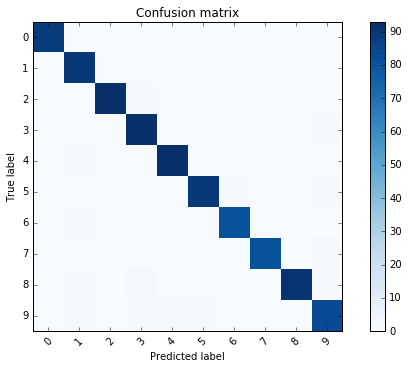

In [35]:
plot_confusion_matrix(conf_matrix)

### Common mistake

The most common mistake (occcured 2 times) is predicting class "3" when the actual one is "8"

Several objects having this type of mistake:


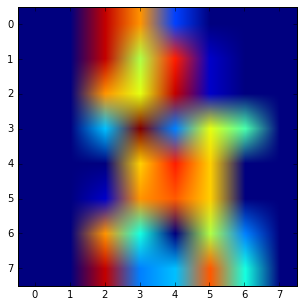

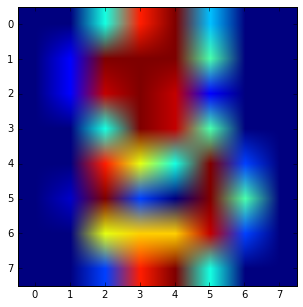

In [36]:
cm_copy = conf_matrix.copy()
np.fill_diagonal(cm_copy, 0)
if not cm_copy.max():
    print("There are no mistakes")
else:
    true_c_ind, pred_c_ind = np.unravel_index(cm_copy.argmax(),cm_copy.shape)
    pred_c, true_c = digits.target_names[pred_c_ind], digits.target_names[true_c_ind]
    print('The most common mistake (occcured %d times) is predicting class "%s" when the actual one is "%s"' % \
         (cm_copy.max(), pred_c, true_c))
    print()

    
    from itertools import islice
    from math import sqrt
    
    MAX_OBJ_COUNT = 10
    print("Several objects having this type of mistake:")
    for image in islice(map(lambda t: t[2].reshape([8,8]),\
                       filter(lambda t: t[0] == true_c and t[1] == pred_c, \
                              zip(y_test, y_pred, X_test))), \
                   MAX_OBJ_COUNT):
        figure()
        imshow(image)
        
    